# Payment Date Prediction

## Import Libraries and Data

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',256)

In [2]:
#reading the data from csv file
df=pd.read_csv('D:\Documents\Personal Docs\Internship\High Radius\H2HBABBA3248.csv')
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corporation,2019-11-04 00:00:00,2019.0,1.930044e+09,2019-10-23,20191022,20191023,20191107.0,USD,RV,1.0,NaN,54356.57,20191023.0,NAH4,1.930044e+09,0
1,CA02,0140106181,THE us,2019-08-07 00:00:00,2019.0,2.960551e+09,2019-05-27,20190527,20190527,20190608.0,CAD,RV,1.0,NaN,19012.80,20190529.0,CA10,2.960551e+09,0
2,U001,0200743123,KROGER co,2020-02-03 00:00:00,2020.0,1.930407e+09,2020-01-17,20200117,20200117,20200201.0,USD,RV,1.0,NaN,43734.66,20200117.0,NAA8,1.930407e+09,0
3,U001,0200455322,PEA systems,2019-04-26 00:00:00,2019.0,1.929000e+09,2019-03-22,20190320,20190322,20190421.0,USD,RV,1.0,NaN,29397.89,20190322.0,NAD5,1.929000e+09,0
4,U001,0200418007,AM llc,2019-10-08 00:00:00,2019.0,1.929889e+09,2019-09-23,20190918,20190923,20191008.0,USD,RV,1.0,NaN,790.80,20190923.0,NAA8,1.929889e+09,0


In [3]:
#finding the datatypes of all columns
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

## Data Preprocessing

In [4]:
#dropping null values in invoice_id column
df.dropna(axis=0,how='any', subset=['invoice_id'],inplace=True)

#converting float to int
df['invoice_id'] = df['invoice_id'].astype('int64')

In [5]:
#dropping null values in doc_id column
df.dropna(axis=0,how='any', subset=['doc_id'],inplace=True)

#converting float to int
df['doc_id'] = df['doc_id'].astype('int64')

In [6]:
#type conversion of date columns to datetime fromat
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])

In [7]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corporation,2019-11-04,2019.0,1930044191,2019-10-23,2019-10-22,2019-10-23,2019-11-07,USD,RV,1.0,NaN,54356.57,2019-10-23,NAH4,1930044191,0
1,CA02,0140106181,THE us,2019-08-07,2019.0,2960550930,2019-05-27,2019-05-27,2019-05-27,2019-06-08,CAD,RV,1.0,NaN,19012.80,2019-05-29,CA10,2960550930,0
2,U001,0200743123,KROGER co,2020-02-03,2020.0,1930407488,2020-01-17,2020-01-17,2020-01-17,2020-02-01,USD,RV,1.0,NaN,43734.66,2020-01-17,NAA8,1930407488,0
3,U001,0200455322,PEA systems,2019-04-26,2019.0,1929000496,2019-03-22,2019-03-20,2019-03-22,2019-04-21,USD,RV,1.0,NaN,29397.89,2019-03-22,NAD5,1929000496,0
4,U001,0200418007,AM llc,2019-10-08,2019.0,1929888696,2019-09-23,2019-09-18,2019-09-23,2019-10-08,USD,RV,1.0,NaN,790.80,2019-09-23,NAA8,1929888696,0


In [8]:
#all the date are coverted to datetime fromat
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                             int64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                         int64
isOpen                             int64
dtype: object

In [9]:
#size of the data after removing null values in invoice_id and doc_id columns
len(df)

49995

In [10]:
#seperating date, month, year, quarter and dayofweek from posting date
df['Date']=df['posting_date'].dt.day
df['Month']=df['posting_date'].dt.month
df['Year']=df['posting_date'].dt.year
df['quarter'] = df['posting_date'].dt.quarter
df['dayofweek'] = df['posting_date'].dt.dayofweek
df['is_weekend'] = np.where(df['dayofweek'].isin([6,5]),1,0)

In [11]:
#delete duplicate rows
df.drop_duplicates(inplace=True)
len(df)

48892

In [12]:
#sort dates based posting_date
df.sort_values(by=['posting_date'],inplace=True)

In [13]:
#make validation set from data having clear date column null
dt=df[df['clear_date'].isnull()]
dt.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Date,Month,Year,quarter,dayofweek,is_weekend
23279,U001,0200793568,SUPE associates,NaT,2020.0,1930580657,2020-02-27,2020-02-28,2020-02-27,2020-03-13,USD,RV,1.0,NaN,49666.90,2020-02-27,NAA8,1930580657,1,27,2,2020,1,3,0
40678,U001,0200772670,ASSOCIAT us,NaT,2020.0,1930578887,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,43984.13,2020-02-27,NAU5,1930578887,1,27,2,2020,1,3,0
16207,CA02,0140105847,GORDON F corp,NaT,2020.0,2960614255,2020-02-27,2020-02-27,2020-02-27,2020-03-10,CAD,RV,1.0,NaN,2780.00,2020-02-29,CA10,2960614255,1,27,2,2020,1,3,0
34141,U001,0100001196,DOLLAR llc,NaT,2020.0,1930570300,2020-02-27,2020-02-25,2020-02-27,2020-03-13,USD,RV,1.0,NaN,5048.28,2020-02-27,NAA8,1930570300,1,27,2,2020,1,3,0
36549,U001,0200769623,WAL-MAR llc,NaT,2020.0,1930577235,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,7536.50,2020-02-27,NAH4,1930577235,1,27,2,2020,1,3,0


In [14]:
#make train set from data having clear date column not null
df=df[df['clear_date'].notnull()]

#calculate the delta value which is to be predicted by our model by subtracting clear_date from due_date
df['delta']=df.iloc[:,3]-df.iloc[:,9]

#convert float values to int
df['delta'] = df['delta'].dt.days.astype('int64')

df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Date,Month,Year,quarter,dayofweek,is_weekend,delta
26891,U001,0200726979,BJ'S in,2019-01-15,2019.0,1928539950,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,168.66,2018-12-30,NAA8,1928539950,0,30,12,2018,4,6,1,1
22215,U001,0200726979,BJ'S corporation,2019-01-15,2019.0,1928540903,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,213.02,2018-12-30,NAA8,1928540903,0,30,12,2018,4,6,1,1
48766,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,1928543258,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,25306.92,2018-12-30,NAH4,1928543258,0,30,12,2018,4,6,1,-5
45984,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1928540908,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,56249.14,2018-12-30,NAH4,1928540908,0,30,12,2018,4,6,1,-5
17379,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1928534352,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,54975.73,2018-12-30,NAH4,1928534352,0,30,12,2018,4,6,1,-5


## EDA

C:\Users\anirudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='business_code', ylabel='count'>

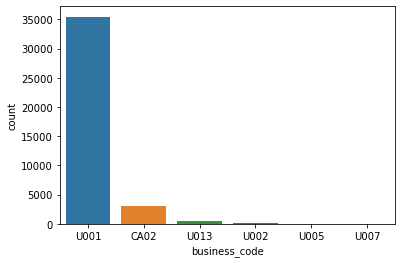

In [15]:
#from this graph this can be inferred that most of the payment were done from U001 company code
import seaborn as sns
sns.countplot(df['business_code'])

C:\Users\anirudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='invoice_currency', ylabel='count'>

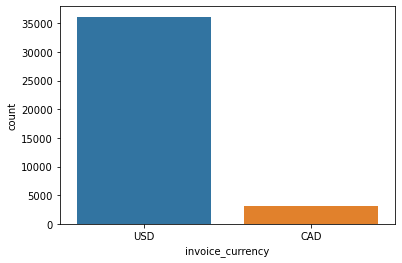

In [16]:
#the plot of currency used int payment
sns.countplot(df['invoice_currency'])

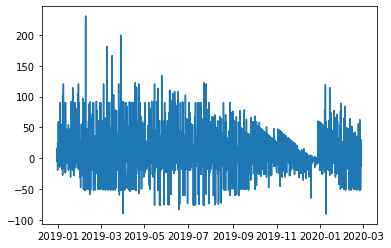

In [17]:
#posting date vs delta graph
import matplotlib.pyplot as plt
plt.plot(df['posting_date'],df['delta'])

C:\Users\anirudh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delta', ylabel='Density'>

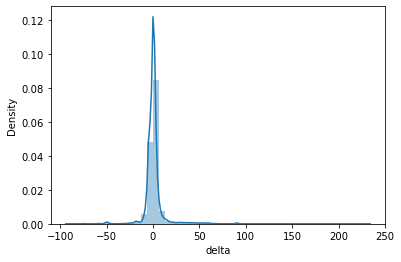

In [18]:
#data follows normal distribution
sns.distplot(df['delta'])

## Feature Engineering

In [19]:
#make one more feature by subtracting posting_date from due_date
df['due-posting']=df.iloc[:,9]-df.iloc[:,6]

#make one more feature by subtracting document_create_date.1 from document_create_date
df['base1-base']=df.iloc[:,8]-df.iloc[:,7]

#convert float values to int
df['due-posting'] = df['due-posting'].dt.days.astype('int64')
df['base1-base'] = df['base1-base'].dt.days.astype('int64')
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Date,Month,Year,quarter,dayofweek,is_weekend,delta,due-posting,base1-base
26891,U001,0200726979,BJ'S in,2019-01-15,2019.0,1928539950,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,168.66,2018-12-30,NAA8,1928539950,0,30,12,2018,4,6,1,1,15,1
22215,U001,0200726979,BJ'S corporation,2019-01-15,2019.0,1928540903,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,213.02,2018-12-30,NAA8,1928540903,0,30,12,2018,4,6,1,1,15,1
48766,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,1928543258,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,25306.92,2018-12-30,NAH4,1928543258,0,30,12,2018,4,6,1,-5,15,0
45984,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1928540908,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,56249.14,2018-12-30,NAH4,1928540908,0,30,12,2018,4,6,1,-5,15,1
17379,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1928534352,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,54975.73,2018-12-30,NAH4,1928534352,0,30,12,2018,4,6,1,-5,15,1


In [20]:
#create one hot enoding of the unique values in the columns
df=pd.get_dummies(df,columns=['business_code','cust_payment_terms','cust_number'])

In [21]:
#convert the total_amount of the data which are having currency as canadian dollar tot US dollar
df['total_open_amount'] = np.where(df['invoice_currency'] == 'CAD',df['total_open_amount'] * 0.7689,df['total_open_amount'])
df.head()

,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen,Date,Month,Year,quarter,dayofweek,is_weekend,delta,due-posting,base1-base,business_code_CA02,business_code_U001,business_code_U002,business_code_U005,business_code_U007,business_code_U013,cust_payment_terms_90M7,cust_payment_terms_B052,cust_payment_terms_B112,cust_payment_terms_BR12,cust_payment_terms_BR56,cust_payment_terms_BR60,cust_payment_terms_C106,cust_payment_terms_C129,cust_payment_terms_CA10,cust_payment_terms_CA30,cust_payment_terms_CA60,cust_payment_terms_CAB1,cust_payment_terms_CAX2,cust_payment_terms_NA10,cust_payment_terms_NA25,cust_payment_terms_NA31,cust_payment_terms_NA32,cust_payment_terms_NA38,cust_payment_terms_NA3B,cust_payment_terms_NA3F,cust_payment_terms_NA84,cust_payment_terms_NA8Q,cust_payment_terms_NA9X,cust_payment_terms_NAA8,cust_payment_terms_NAAW,cust_payment_terms_NAAX,cust_payment_terms_NAB1,cust_payment_terms_NABG,cust_payment_terms_NAC6,cust_payment_terms_NACB,cust_payment_terms_NACE,cust_payment_terms_NAD1,cust_payment_terms_NAD4,cust_payment_terms_NAD5,cust_payment_terms_NAD8,cust_payment_terms_NAG2,cust_payment_terms_NAGD,cust_payment_terms_NAH4,cust_payment_terms_NAM1,cust_payment_terms_NAM2,cust_payment_terms_NAM3,cust_payment_terms_NAM4,cust_payment_terms_NATH,cust_payment_terms_NATJ,cust_payment_terms_NATK,cust_payment_terms_NATL,cust_payment_terms_NATM,cust_payment_terms_NATU,cust_payment_terms_NATV,cust_payment_terms_NATW,cust_payment_terms_NATX,cust_payment_terms_NATZ,cust_payment_terms_NAU5,cust_payment_terms_NAUI,cust_payment_terms_NAUP,cust_payment_terms_NAUW,cust_payment_terms_NAUY,cust_payment_terms_NAUZ,cust_payment_terms_NAV2,cust_payment_terms_NAV9,cust_payment_terms_NAVC,cust_payment_terms_NAVD,cust_payment_terms_NAVE,cust_payment_terms_NAVF,cust_payment_terms_NAVL,cust_payment_terms_NAVM,cust_payment_terms_NAVQ,cust_payment_terms_NAVR,cust_payment_terms_NAWM,cust_payment_terms_NAWN,cust_payment_terms_NAWP,cust_payment_terms_NAWU,cust_payment_terms_NAX2,cust_number_0100000048,cust_number_0100000158,cust_number_0100000217,cust_number_0100000222,cust_number_0100000492,cust_number_0100000533,cust_number_0100000582,cust_number_0100000843,cust_number_0100000933,cust_number_0100001123,cust_number_0100001196,cust_number_0100001222,cust_number_0100001362,cust_number_0100001452,cust_number_0100003940,cust_number_0100004335,cust_number_0100004536,cust_number_0100004744,cust_number_0100004789,cust_number_0100004803,cust_number_0100006311,cust_number_0100006887,cust_number_0100007171,cust_number_0100007796,...,cust_number_200749582,cust_number_200749782,cust_number_200750051,cust_number_200752302,cust_number_200752393,cust_number_200754118,cust_number_200754278,cust_number_200756072,cust_number_200756811,cust_number_200758531,cust_number_200759082,cust_number_200759878,cust_number_200760666,cust_number_200761734,cust_number_200762301,cust_number_200762950,cust_number_200763152,cust_number_200763229,cust_number_200763814,cust_number_200764795,cust_number_200765011,cust_number_200768357,cust_number_200769369,cust_number_200769556,cust_number_200769623,cust_number_200770677,cust_number_200771157,cust_number_200772595,cust_number_200772670,cust_number_200773364,cust_number_200774000,cust_number_200775094,cust_number_200776463,cust_number_200777735,cust_number_200778355,cust_number_200778870,cust_number_200778998,cust_number_200779051,cust_number_200779111,cust_number_200779166,cust_number_200779719,cust_number_200779906,cust_number_200780383,cust_number_200780825,cust_number_200781484,cust_number_200781803,cust_number_200781831,cust_number_200782001,cust_number_200782669,cust_number_200783189,cust_number_200783609,cust_number_200783734,cust_number_200784454,cust_number_200784489,cust_number_200785971,cust_number_200786288,cust_number_200789077,cust_number_200790107

In [22]:
from sklearn.model_selection import train_test_split

#splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(df.drop('delta',axis=1),df['delta'],test_size=0.2,shuffle=False)

In [23]:
#take mean of total_amount based on quarters 
mapper = x_train.groupby('quarter')['total_open_amount'].mean().to_dict()
x_train['avg_cust_q']=x_train['quarter'].map(mapper)
x_test['avg_cust_q']=x_test['quarter'].map(mapper)

In [24]:
#take mean of total_amount based on if it is weekend or not
mapper = x_train.groupby('is_weekend')['total_open_amount'].mean().to_dict()
x_train['avg_cust_w']=x_train['is_weekend'].map(mapper)
x_test['avg_cust_w']=x_test['is_weekend'].map(mapper)

In [25]:
#perform log transfrom on continuos variable to bring it to logarithmic scale and also used to scale outliers
c=['avg_cust_q','avg_cust_w','total_open_amount']
x_train[c]=np.log(x_train[c])
x_test[c]=np.log(x_test[c])
x_train.head()

,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen,Date,Month,Year,quarter,dayofweek,is_weekend,due-posting,base1-base,business_code_CA02,business_code_U001,business_code_U002,business_code_U005,business_code_U007,business_code_U013,cust_payment_terms_90M7,cust_payment_terms_B052,cust_payment_terms_B112,cust_payment_terms_BR12,cust_payment_terms_BR56,cust_payment_terms_BR60,cust_payment_terms_C106,cust_payment_terms_C129,cust_payment_terms_CA10,cust_payment_terms_CA30,cust_payment_terms_CA60,cust_payment_terms_CAB1,cust_payment_terms_CAX2,cust_payment_terms_NA10,cust_payment_terms_NA25,cust_payment_terms_NA31,cust_payment_terms_NA32,cust_payment_terms_NA38,cust_payment_terms_NA3B,cust_payment_terms_NA3F,cust_payment_terms_NA84,cust_payment_terms_NA8Q,cust_payment_terms_NA9X,cust_payment_terms_NAA8,cust_payment_terms_NAAW,cust_payment_terms_NAAX,cust_payment_terms_NAB1,cust_payment_terms_NABG,cust_payment_terms_NAC6,cust_payment_terms_NACB,cust_payment_terms_NACE,cust_payment_terms_NAD1,cust_payment_terms_NAD4,cust_payment_terms_NAD5,cust_payment_terms_NAD8,cust_payment_terms_NAG2,cust_payment_terms_NAGD,cust_payment_terms_NAH4,cust_payment_terms_NAM1,cust_payment_terms_NAM2,cust_payment_terms_NAM3,cust_payment_terms_NAM4,cust_payment_terms_NATH,cust_payment_terms_NATJ,cust_payment_terms_NATK,cust_payment_terms_NATL,cust_payment_terms_NATM,cust_payment_terms_NATU,cust_payment_terms_NATV,cust_payment_terms_NATW,cust_payment_terms_NATX,cust_payment_terms_NATZ,cust_payment_terms_NAU5,cust_payment_terms_NAUI,cust_payment_terms_NAUP,cust_payment_terms_NAUW,cust_payment_terms_NAUY,cust_payment_terms_NAUZ,cust_payment_terms_NAV2,cust_payment_terms_NAV9,cust_payment_terms_NAVC,cust_payment_terms_NAVD,cust_payment_terms_NAVE,cust_payment_terms_NAVF,cust_payment_terms_NAVL,cust_payment_terms_NAVM,cust_payment_terms_NAVQ,cust_payment_terms_NAVR,cust_payment_terms_NAWM,cust_payment_terms_NAWN,cust_payment_terms_NAWP,cust_payment_terms_NAWU,cust_payment_terms_NAX2,cust_number_0100000048,cust_number_0100000158,cust_number_0100000217,cust_number_0100000222,cust_number_0100000492,cust_number_0100000533,cust_number_0100000582,cust_number_0100000843,cust_number_0100000933,cust_number_0100001123,cust_number_0100001196,cust_number_0100001222,cust_number_0100001362,cust_number_0100001452,cust_number_0100003940,cust_number_0100004335,cust_number_0100004536,cust_number_0100004744,cust_number_0100004789,cust_number_0100004803,cust_number_0100006311,cust_number_0100006887,cust_number_0100007171,cust_number_0100007796,cust_number_0100007916,...,cust_number_200750051,cust_number_200752302,cust_number_200752393,cust_number_200754118,cust_number_200754278,cust_number_200756072,cust_number_200756811,cust_number_200758531,cust_number_200759082,cust_number_200759878,cust_number_200760666,cust_number_200761734,cust_number_200762301,cust_number_200762950,cust_number_200763152,cust_number_200763229,cust_number_200763814,cust_number_200764795,cust_number_200765011,cust_number_200768357,cust_number_200769369,cust_number_200769556,cust_number_200769623,cust_number_200770677,cust_number_200771157,cust_number_200772595,cust_number_200772670,cust_number_200773364,cust_number_200774000,cust_number_200775094,cust_number_200776463,cust_number_200777735,cust_number_200778355,cust_number_200778870,cust_number_200778998,cust_number_200779051,cust_number_200779111,cust_number_200779166,cust_number_200779719,cust_number_200779906,cust_number_200780383,cust_number_200780825,cust_number_200781484,cust_number_200781803,cust_number_200781831,cust_number_200782001,cust_number_200782669,cust_number_200783189,cust_number_200783609,cust_number_200783734,cust_number_200784454,cust_number_200784489,cust_number_200785971,cust_number_200786288,cust_number_200789077,cust_number_200790107,cust_number_200790710,cust

## Feature Selection

In [26]:
#add delta column to x_train for finding corelation
x_train['delta']=df['delta']

In [27]:
#select the features having corelation greater than threshold(.12)
c=x_train.corr()['delta'].abs()
col=c[c>.12].index
c[c>.12]

doc_id                     0.127962
invoice_id                 0.127962
due-posting                0.205419
business_code_CA02         0.125307
business_code_U001         0.154390
cust_payment_terms_CA10    0.125643
cust_payment_terms_NAGD    0.143812
cust_payment_terms_NAH4    0.151015
cust_payment_terms_NAVF    0.130610
cust_payment_terms_NAX2    0.472456
cust_number_0140106181     0.235069
cust_number_0200769623     0.150077
cust_number_CCU013         0.451371
delta                      1.000000
Name: delta, dtype: float64

In [28]:
#drop delta column (becoz used in output) and doc_id, invoice_id as they are unique
col=col.drop(['delta','doc_id','invoice_id'])
x_train=x_train.loc[:,col]
x_test=x_test.loc[:,col]

## Modelling

### Base Model

#### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

#fit the model on train data 
lr = LinearRegression().fit(x_train,y_train) 

#find the predicted yhat value
yhat=lr.predict(x_test).astype('int')  

#find rmse of the model
mean_squared_error(y_test,yhat,squared=False)

7.649179959851445

### Tree Based Model

#### Random Forest Regresor

In [30]:
from sklearn.ensemble import RandomForestRegressor

#create instance of the model 
rf = RandomForestRegressor(max_depth=5, random_state=0)

#fit the model on train data 
rf.fit(x_train,y_train)

#find the predicted y_pre value
y_pre=rf.predict(x_test).astype('int')

#find rmse of the model
mean_squared_error(y_test,y_pre,squared=False)

7.680506074337662

#### Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor

#create instance of the model 
dtr = DecisionTreeRegressor(random_state=0 , max_depth=20)

#fit the model on train data 
dtr.fit(x_train, y_train)

#find the predicted y_predict2 value
y_predict2 = dtr.predict(x_test)

#find rmse of the model
mean_squared_error(y_test, y_predict2, squared=False)

7.363302791412354

#### XGBOOST Regressor

In [32]:
import xgboost
xg=xgboost.XGBRegressor(verbosity=None).fit(x_train,y_train)

#find the predicted y_hat value
y_hat=xg.predict(x_test)

#find rmse of the model
mean_squared_error(y_test, y_hat, squared=False)

7.36252722667206

In [33]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xg,x_train,y_train,cv=10)
score.mean()

0.40416357840814265

As the XGBOOST Regressor has the least rmse Hence we will use that model for prediction

In [34]:
#r2score of the best model (XGBOOSt)
r2_score(y_test, y_hat)*100

41.75285853568306

## Prediction on Validation Set

In [35]:
#making a copy of dataframe
dx=dt
dx.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Date,Month,Year,quarter,dayofweek,is_weekend
23279,U001,0200793568,SUPE associates,NaT,2020.0,1930580657,2020-02-27,2020-02-28,2020-02-27,2020-03-13,USD,RV,1.0,NaN,49666.90,2020-02-27,NAA8,1930580657,1,27,2,2020,1,3,0
40678,U001,0200772670,ASSOCIAT us,NaT,2020.0,1930578887,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,43984.13,2020-02-27,NAU5,1930578887,1,27,2,2020,1,3,0
16207,CA02,0140105847,GORDON F corp,NaT,2020.0,2960614255,2020-02-27,2020-02-27,2020-02-27,2020-03-10,CAD,RV,1.0,NaN,2780.00,2020-02-29,CA10,2960614255,1,27,2,2020,1,3,0
34141,U001,0100001196,DOLLAR llc,NaT,2020.0,1930570300,2020-02-27,2020-02-25,2020-02-27,2020-03-13,USD,RV,1.0,NaN,5048.28,2020-02-27,NAA8,1930570300,1,27,2,2020,1,3,0
36549,U001,0200769623,WAL-MAR llc,NaT,2020.0,1930577235,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,NaN,7536.50,2020-02-27,NAH4,1930577235,1,27,2,2020,1,3,0


In [36]:
#Preprocessing and feature engineering on validation set
dt=pd.get_dummies(dt,columns=['business_code','cust_payment_terms','cust_number'])
dt['total_open_amount'] = np.where(dt['invoice_currency'] == 'CAD',dt['total_open_amount'] * 0.7689,dt['total_open_amount'])
mapper = dt.groupby('quarter')['total_open_amount'].mean().to_dict()
dt['avg_cust_q']=dt['quarter'].map(mapper)
mapper = dt.groupby('is_weekend')['total_open_amount'].mean().to_dict()
dt['avg_cust_w']=dt['is_weekend'].map(mapper)
dt['due-posting']=dt.iloc[:,7]-dt.iloc[:,4]
dt['due-posting'] = dt['due-posting'].dt.days.astype('int64')
c=['avg_cust_q','avg_cust_w','total_open_amount']
dt[c]=np.log(dt[c])

In [37]:
#passing the same features as the train set
X_val=dt.loc[:,col]
X_val.head()

,due-posting,business_code_CA02,business_code_U001,cust_payment_terms_CA10,cust_payment_terms_NAGD,cust_payment_terms_NAH4,cust_payment_terms_NAVF,cust_payment_terms_NAX2,cust_number_0140106181,cust_number_0200769623,cust_number_CCU013
23279,15,0,1,0,0,0,0,0,0,0,0
40678,15,0,1,0,0,0,0,0,0,0,0
16207,12,1,0,1,0,0,0,0,0,0,0
34141,15,0,1,0,0,0,0,0,0,0,0
36549,15,0,1,0,0,1,0,0,0,1,0


In [38]:
#predicting the delay and add to the dataframe
dt['delay']=xg.predict(X_val).astype('int')

#add the delay to the due date and enter that value in clear date column 
dt['Predicted Payment Date']=dt.apply(lambda x: x['due_in_date'] + pd.DateOffset(x['delay']), axis=1)

In [39]:
dt.head() 

,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen,Date,Month,Year,quarter,dayofweek,is_weekend,business_code_CA02,business_code_U001,business_code_U002,business_code_U005,business_code_U007,business_code_U013,cust_payment_terms_90M7,cust_payment_terms_BR12,cust_payment_terms_C106,cust_payment_terms_C129,cust_payment_terms_CA10,cust_payment_terms_CA30,cust_payment_terms_CA60,cust_payment_terms_CAB1,cust_payment_terms_CAX2,cust_payment_terms_NA10,cust_payment_terms_NA25,cust_payment_terms_NA32,cust_payment_terms_NA38,cust_payment_terms_NA3B,cust_payment_terms_NA3F,cust_payment_terms_NA84,cust_payment_terms_NAA8,cust_payment_terms_NAAW,cust_payment_terms_NAAX,cust_payment_terms_NAB1,cust_payment_terms_NABG,cust_payment_terms_NAC6,cust_payment_terms_NACG,cust_payment_terms_NACH,cust_payment_terms_NAD1,cust_payment_terms_NAD4,cust_payment_terms_NAD5,cust_payment_terms_NAG2,cust_payment_terms_NAGD,cust_payment_terms_NAH4,cust_payment_terms_NAM1,cust_payment_terms_NAM2,cust_payment_terms_NAM3,cust_payment_terms_NAM4,cust_payment_terms_NAU5,cust_payment_terms_NAUZ,cust_payment_terms_NAV9,cust_payment_terms_NAVD,cust_payment_terms_NAVE,cust_payment_terms_NAVF,cust_payment_terms_NAVQ,cust_payment_terms_NAWP,cust_payment_terms_NAX2,cust_number_0100000222,cust_number_0100000533,cust_number_0100001196,cust_number_0100001452,cust_number_0100004536,cust_number_0100006311,cust_number_0100007916,cust_number_0100008001,cust_number_0100009932,cust_number_0100010645,cust_number_0100011958,cust_number_0100012638,cust_number_0100012698,cust_number_0100012991,cust_number_0100013521,cust_number_0100014724,cust_number_0100015557,cust_number_0100017545,cust_number_0100021489,cust_number_0100021540,cust_number_0100024102,cust_number_0100024767,cust_number_0100024776,cust_number_0100025470,cust_number_0100025658,cust_number_0100026809,cust_number_0100026939,cust_number_0100026947,cust_number_0100027971,cust_number_0100028409,cust_number_0100028450,cust_number_0100028524,cust_number_0100028715,cust_number_0100028952,cust_number_0100029649,cust_number_0100030014,cust_number_0100030194,cust_number_0100030443,cust_number_0100030964,cust_number_0100031342,cust_number_0100031483,cust_number_0100031628,cust_number_0100031686,cust_number_0100031704,cust_number_0100031723,cust_number_0100031970,cust_number_0100032523,cust_number_0100032791,cust_number_0100033268,cust_number_0100033439,cust_number_0100034330,cust_number_0100034821,cust_number_0100034961,cust_number_0100035143,cust_number_0100035145,cust_number_0100035877,cust_number_0100035976,...,cust_number_200152991,cust_number_200230690,cust_number_200275115,cust_number_200315290,cust_number_200331749,cust_number_200357714,cust_number_200374578,cust_number_200416837,cust_number_200418007,cust_number_200434439,cust_number_200439158,cust_number_200466603,cust_number_200468954,cust_number_200515231,cust_number_200519201,cust_number_200540723,cust_number_200555117,cust_number_200561861,cust_number_200571849,cust_number_200637319,cust_number_200668077,cust_number_200687594,cust_number_200696090,cust_number_200697207,cust_number_200700919,cust_number_200701314,cust_number_200704045,cust_number_200705089,cust_number_200705372,cust_number_200705742,cust_number_200706844,cust_number_200707005,cust_number_200707822,cust_number_200711029,cust_number_200712102,cust_number_200712105,cust_number_200712187,cust_number_200712836,cust_number_200719839,cust_number_200726979,cust_number_200729290,cust_number_200731999,cust_number_200734065,cust_number_200735528,cust_number_200736312,cust_number_200739006,cust_number_200739534,cust_number_200741174,cust_number_200742791,cust_number_200743123,cust_number_200743129,cust_number_200743996,cust_number_200744019,cust_number_200747369,cust_number_200748108,cust_number_200749225,cust_number_200750051,cust_number

## Bucketing

In [40]:
# grouping the delay into buckets
# Bucket1 <0
# Bucket2 0-15
# Bucket3 16-30
# Bucket4 31-45
# Bucket5 45<
dt['Ageing_bucket']=dt['delay'].apply(lambda x: 1 if(x)<=0 else(2 if x<=15 else (3 if x<=30 else (4 if x<=45 else 5))))

In [41]:
#count of delay in each bucket
dt['Ageing_bucket'].value_counts()

2    5785
1    3845
4      62
3      11
5      10
Name: Ageing_bucket, dtype: int64

C:\Users\anirudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ageing_bucket', ylabel='count'>

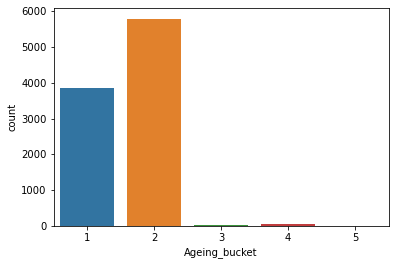

In [42]:
#countplot of the Aging bucktet
sns.countplot(dt['Ageing_bucket'])

In [43]:
#making final dataframe
dt=dt.loc[:,['name_customer','invoice_id','total_open_amount','due_in_date','Predicted Payment Date','Ageing_bucket']]
dt.reset_index(inplace=True,drop=True)
dt.head()

,name_customer,invoice_id,total_open_amount,due_in_date,Predicted Payment Date,Ageing_bucket
0,SUPE associates,1930580657,10.813094,2020-03-13,2020-03-14,2
1,ASSOCIAT us,1930578887,10.691584,2020-03-13,2020-03-14,2
2,GORDON F corp,2960614255,7.667412,2020-03-10,2020-03-12,2
3,DOLLAR llc,1930570300,8.526803,2020-03-13,2020-03-14,2
4,WAL-MAR llc,1930577235,8.927513,2020-03-13,2020-03-11,1


In [44]:
#adding customer number columns
dt.insert(1,"Customer Number",dx['cust_number'].values)
dt.head()

,name_customer,Customer Number,invoice_id,total_open_amount,due_in_date,Predicted Payment Date,Ageing_bucket
0,SUPE associates,0200793568,1930580657,10.813094,2020-03-13,2020-03-14,2
1,ASSOCIAT us,0200772670,1930578887,10.691584,2020-03-13,2020-03-14,2
2,GORDON F corp,0140105847,2960614255,7.667412,2020-03-10,2020-03-12,2
3,DOLLAR llc,0100001196,1930570300,8.526803,2020-03-13,2020-03-14,2
4,WAL-MAR llc,0200769623,1930577235,8.927513,2020-03-13,2020-03-11,1


In [45]:
#filling notes column with nan
dt['Notes']=np.nan

In [46]:
#renaming the columns
dt.rename(columns={"name_customer":"Customer Name","invoice_id":"Invoice Number","total_open_amount":"Invoice Amount","due_in_date":"Due Date"},inplace=True)
dt.head()

,Customer Name,Customer Number,Invoice Number,Invoice Amount,Due Date,Predicted Payment Date,Ageing_bucket,Notes
0,SUPE associates,0200793568,1930580657,10.813094,2020-03-13,2020-03-14,2,NaN
1,ASSOCIAT us,0200772670,1930578887,10.691584,2020-03-13,2020-03-14,2,NaN
2,GORDON F corp,0140105847,2960614255,7.667412,2020-03-10,2020-03-12,2,NaN
3,DOLLAR llc,0100001196,1930570300,8.526803,2020-03-13,2020-03-14,2,NaN
4,WAL-MAR llc,0200769623,1930577235,8.927513,2020-03-13,2020-03-11,1,NaN


In [47]:
#converting to csv file for integration with frontend
dt.to_csv('table.csv',index=False)

## Result

The ML model to predict the Payment date and grouping the data into buckets based on delay has been successfully and the given date has been successfully predicted and grouped into respective buckets.